In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
datam = pd.read_csv("movies_metadata.csv")
datac = pd.read_csv("credits.csv")

In [3]:
datam.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
datac.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
datam['release_date'] = pd.to_datetime(datam['release_date'],errors='coerce')

In [6]:
datam.dtypes

adult                            object
belongs_to_collection            object
budget                           object
genres                           object
homepage                         object
id                               object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                       object
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
dtype: object

In [7]:
datam['year'] = datam['release_date'].dt.year

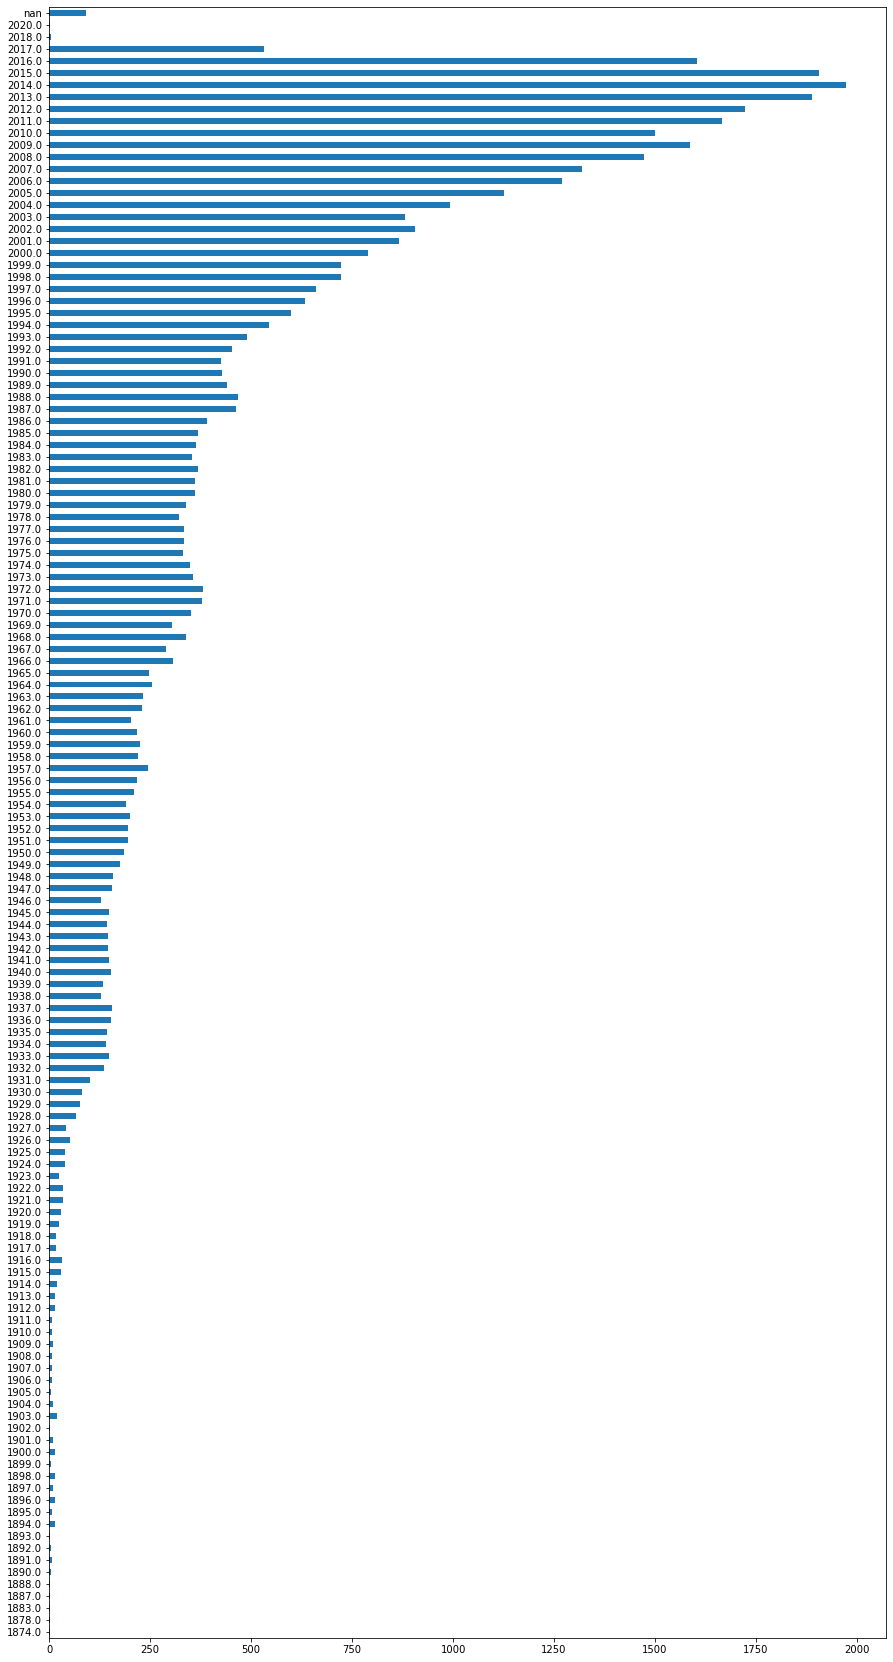

In [8]:
datam.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,30));

In [9]:
##In the previous IMDB movie data we have movies till 2016 so now here we will get movies of further years

In [10]:
new_meta = datam.loc[datam.year == 2017,['genres','id','title','year']]

In [11]:
new_meta.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [12]:
new_meta.shape

(532, 4)

In [13]:
new_meta.id = new_meta.id.astype(int)

In [14]:
data = pd.merge(new_meta, datac, on='id')

In [15]:
data.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [16]:
data.shape

(531, 6)

In [17]:
data.dtypes

genres     object
id          int32
title      object
year      float64
cast       object
crew       object
dtype: object

In [18]:
##As we see in the columns genre, case and crew the values are in key value pairs.ie., a dictionary but in a list
#so, the values are in list format
#we must convert this list to dictionary to form columns out of it
#Henceforth we use 'ast' library and command 'literal_eval' to convert it

In [19]:
import ast

data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [20]:
data['genres'][1]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [21]:
def make_genres_list(x):
    gen = []
    st = ' '
    for i in x:
        if i.get('name')=='Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return(st.join(gen))

In [22]:
data['genres_list'] = data['genres'].map(lambda x: make_genres_list(x))

In [23]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [24]:
data['cast'][0]

[{'cast_id': 1,
  'character': 'Captain Jack Sparrow',
  'credit_id': '52fe4c9cc3a36847f8236a53',
  'gender': 2,
  'id': 85,
  'name': 'Johnny Depp',
  'order': 0,
  'profile_path': '/kbWValANhZI8rbWZXximXuMN4UN.jpg'},
 {'cast_id': 9,
  'character': 'Captain Armando Salazar',
  'credit_id': '54db4949c3a368122d0017fe',
  'gender': 2,
  'id': 3810,
  'name': 'Javier Bardem',
  'order': 1,
  'profile_path': '/grBOK7Ep09JBE3H5LyV5JaZZ1XZ.jpg'},
 {'cast_id': 16,
  'character': 'Captain Hector Barbossa',
  'credit_id': '54e44e5ec3a368454b00a02f',
  'gender': 2,
  'id': 118,
  'name': 'Geoffrey Rush',
  'order': 2,
  'profile_path': '/5h91WHSK80YtqTk1bMiar2IZzO2.jpg'},
 {'cast_id': 7,
  'character': 'Henry Turner',
  'credit_id': '54db49359251415a0d0012a0',
  'gender': 2,
  'id': 1017347,
  'name': 'Brenton Thwaites',
  'order': 3,
  'profile_path': '/dM0m0OxREfW4HxwV2qQeitS8dfO.jpg'},
 {'cast_id': 8,
  'character': 'Carina Smyth',
  'credit_id': '54db493e925141618f00189a',
  'gender': 1,
  '

In [25]:
def get_actor1_name(x):
    act = []
    for i in x:
        act.append(i.get('name'))
    if act == []:
        return np.NaN
    else:
        return(act[0])

In [26]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1_name(x))

In [27]:
data['actor_1_name'][0]

'Johnny Depp'

In [28]:
def get_actor2_name(x):
    act = []
    for i in x:
        act.append(i.get('name'))
    if act == [] or len(act)<=1:
        return np.NaN
    else:
        return(act[1])

In [29]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2_name(x))

In [30]:
data['actor_2_name'][0]

'Javier Bardem'

In [31]:
def get_actor3_name(x):
    act = []
    for i in x:
        act.append(i.get('name'))
    if act == [] or len(act)<=2:
        return np.NaN
    else:
        return(act[2])

In [32]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3_name(x))

In [33]:
data['actor_3_name'][0]

'Geoffrey Rush'

In [34]:
data['crew'][0]

[{'credit_id': '52fe4c9cc3a36847f8236a65',
  'department': 'Production',
  'gender': 2,
  'id': 770,
  'job': 'Producer',
  'name': 'Jerry Bruckheimer',
  'profile_path': '/lQu9eRzRX264j2LFQwvKC50wb9s.jpg'},
 {'credit_id': '592f443cc3a3685cf7000019',
  'department': 'Writing',
  'gender': 2,
  'id': 1705,
  'job': 'Characters',
  'name': 'Ted Elliott',
  'profile_path': '/9OXGC59dpVDdfwSeEdHgxpoHXVu.jpg'},
 {'credit_id': '591298d6c3a36864fc04d1a4',
  'department': 'Production',
  'gender': 2,
  'id': 1706,
  'job': 'Executive Producer',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'},
 {'credit_id': '52fe4c9cc3a36847f8236a5f',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Characters',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'},
 {'credit_id': '591298289251414e8904f223',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Story',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykond

In [35]:
def directors(x):
    dire = []
    st = ' '
    for i in x:
        if i.get('job') == 'Director':
            dire.append(i.get('name'))
    if dire == []:
        return np.NaN
    else:
        return(st.join(dire))

In [36]:
data['director_name'] = data['crew'].map(lambda x: directors(x))

In [37]:
data['director_name'][0]

'Joachim Rønning Espen Sandberg'

In [38]:
data.columns

Index(['genres', 'id', 'title', 'year', 'cast', 'crew', 'genres_list',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name'],
      dtype='object')

In [39]:
new_data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [40]:
new_data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter


In [41]:
new_data.isnull().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [42]:
new_data = new_data.dropna()

In [43]:
new_data.rename(columns = {'genres_list':'genres','title':'movie_title'}, inplace=True)

In [44]:
new_data.shape

(458, 6)

In [45]:
new_data['movie_title'] = new_data['movie_title'].str.lower()

In [46]:
new_data['combined'] = new_data['actor_1_name']+' '+new_data['actor_2_name']+' '+new_data['actor_3_name']+' '+new_data['director_name']+' '+new_data['genres']

In [47]:
new_data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combined
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachi...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett ...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gu...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Se...


In [48]:
###lets read IMBD data

In [49]:
old_data = pd.read_csv("IMDB_Processed.csv")

In [50]:
old_data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens ...


In [51]:
old_data['combined'] = old_data['actor_1_name']+ ' '+old_data['actor_2_name']+' '+old_data['actor_3_name']+' '+old_data['director_name']+' '+old_data['genres']

In [52]:
appended_data = old_data.append(new_data)

In [53]:
appended_data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combined
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker Unknown Doug Walker Doc...


In [54]:
appended_data.shape

(5501, 7)

In [55]:
appended_data.drop_duplicates(subset='movie_title', keep='last', inplace=True)

In [56]:
appended_data.shape

(5364, 7)

In [57]:
appended_data.to_csv('Appended Data.csv', index=False)